
#**THE SPARKS FOUNDATION INTERNSHIP**

## Domain : Data Science and Business Analytics

#**GRIP Task1**
###***PREDICTION USING SUPERVISED ML***

### Step1.1: Importing Libraries and Loading DataSet

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np # linear Algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from scipy import stats

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

df = pd.read_csv(url)

###Step1.2 "Reading and Understanding the Data"

In [4]:
#reading data 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#shape of data i.e rows and columns 
df.shape

(25, 2)

In [6]:
#Columns present in the DataSet
print(*df.columns,sep='\n')

Hours
Scores


In [7]:
df.info()

#it will give Totla No of Columns and their non null count with data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#checking for null valuesd 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
#checking for duplicates

df[df.duplicated(keep='first')].value_counts().sum()

0

###Step 2: EDA or Data Analysis

In [10]:
#null value percentage
null_perc = pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2)).reset_index()
null_perc.columns = ['Variable','%Missing_Value']
null_perc

,Variable,%Missing_Value
0,Hours,0.0
1,Scores,0.0


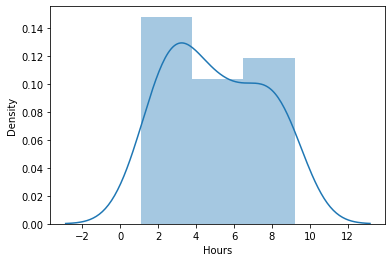

In [11]:
sns.distplot(df["Hours"])

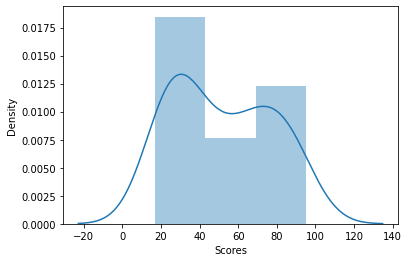

In [12]:
sns.distplot(df["Scores"])

In [13]:
#statistical summary
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
90%,8.420000,85.600000
95%,8.820000,87.600000
99%,9.128000,93.320000


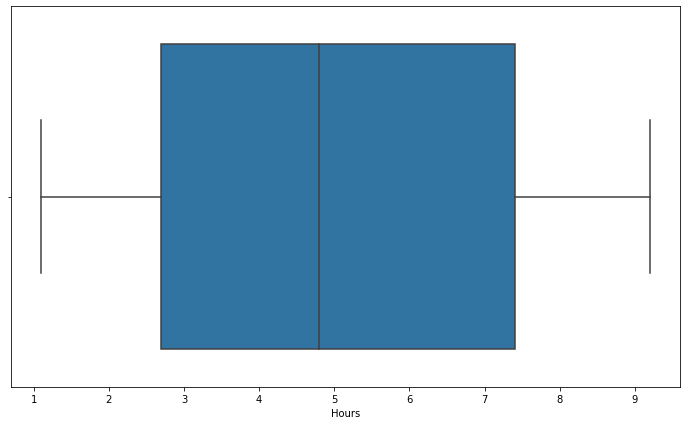

In [14]:
#visualizing columns with box plot

plt.figure(figsize=[12,7])
sns.boxplot(df['Hours'])
plt.show()

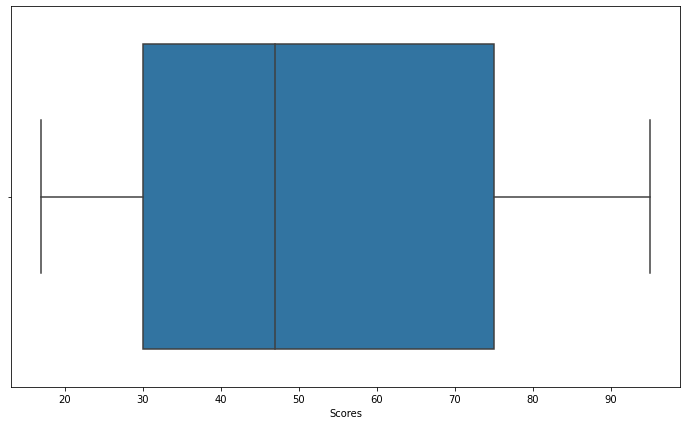

In [15]:
#visualizing columns with box plot

plt.figure(figsize=[12,7])
sns.boxplot(df['Scores'])
plt.show()

In [16]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


* Data is Clean with no Null Values and No outliers present.

###Step 3: Data Visualization

Text(0.5, 0, 'Hours')

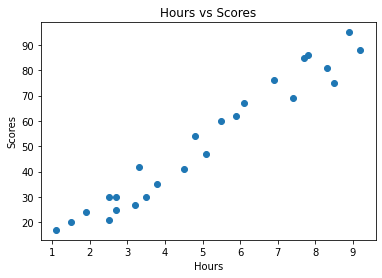

In [17]:

plt.scatter(df["Hours"],df['Scores'])
plt.title('Hours vs Scores')
plt.ylabel('Scores')
plt.xlabel('Hours')

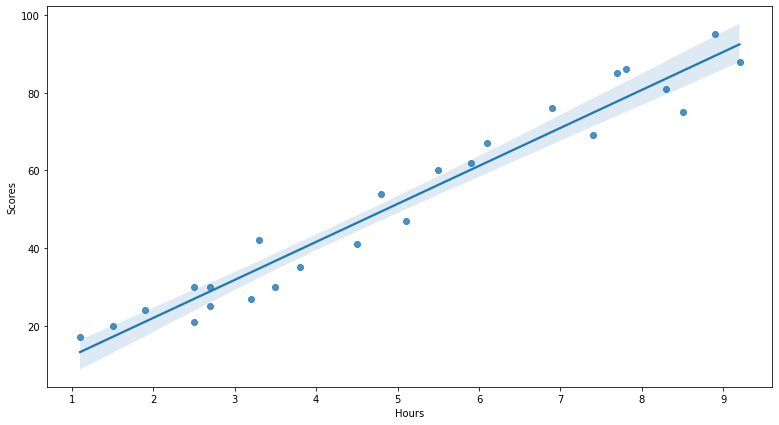

In [52]:
plt.figure(figsize = (13,7))

sns.regplot(x=df['Hours'],y=df['Scores'])

**Inferences**
* There is Linear relationship between Hours Studies and Scores

###Step 4 : Model Building and Model Development

In [38]:
X = df.drop(["Scores"], axis=1)  #feature variable
y = df["Scores"]  #target variable

Splitting into training and testing data set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [40]:
#shape of training and testing test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


####**✨MODEL BUILDING✨**

In [41]:
#importing libraries for Linear regression
from sklearn.linear_model import LinearRegression

#libraries for matrices
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [42]:
#Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model 
lr.fit(X_train,y_train)

# Model Summary..checking acc of model on training set
y_pred_lr = lr.predict(X_train)

In [43]:
print(lr.score(X_train, y_train))

0.9637848283990599


In [44]:
#summary of our regression model
print('-'*30,"\n")
print(f'Model: {str(lr)}')
print(f'RMSE:  {mean_squared_error(y_train,y_pred_lr)}')
print(f'MAE:   {mean_absolute_error(y_train, y_pred_lr)}')
print(f'R2:    {r2_score(y_train, y_pred_lr)}')
print('-'*30)

------------------------------ 

Model: LinearRegression()
RMSE:  22.905643347949606
MAE:   4.577806302202314
R2:    0.9637848283990599
------------------------------


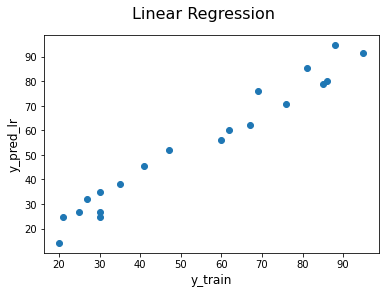

In [45]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred_lr)

#title
fig.suptitle("Linear Regression ", fontsize=16)              # Plot heading 

#axis label
plt.xlabel('y_train', fontsize=12)                          # X-label
plt.ylabel('y_pred_lr', fontsize=12)
plt.show()

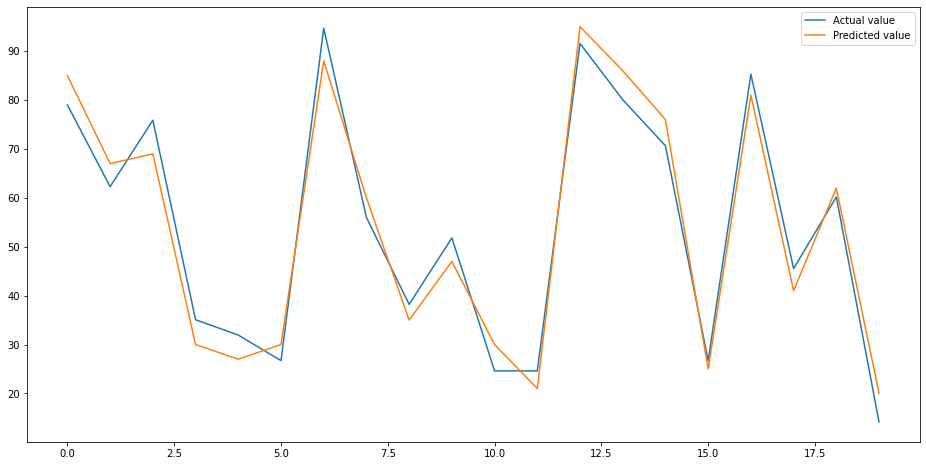

In [46]:
test = pd.DataFrame({'Predicted value':y_pred_lr, 'Actual value':y_train})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

######**Finding the weights and bias**

In [47]:
#Obtain the bias (intercept) of the regression
lr.intercept_

-1.5369573315500702

In [48]:
# Obtain the weights (coefficients) of the regression
lr.coef_

array([10.46110829])

**TESTING OF MODEL ON TEST DATA AND CHECKING ACCURACY**

**Testing Model Accuracy on Test Data**
------------------------------ 

Model: LinearRegression()
RMSE:  68.88092074277635
MAE:   7.882398086270432
R2:    0.8421031525243527
------------------------------


Text(0, 0.5, 'y_pred')

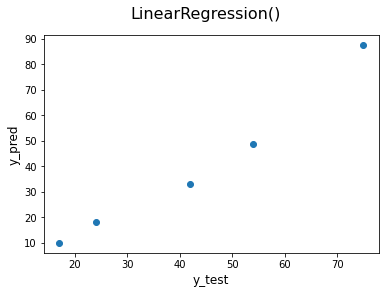

In [49]:
m = LinearRegression()

# Training Model 
m.fit(X_train, y_train)
     
#model summary
y_pred = m.predict(X_test)


print("**Testing Model Accuracy on Test Data**")
print('-'*30,"\n")
print(f'Model: {str(m)}')
print(f'RMSE:  {mean_squared_error(y_test,y_pred)}')
print(f'MAE:   {mean_absolute_error(y_test, y_pred)}')
print(f'R2:    {r2_score(y_test, y_pred)}')
print('-'*30)


#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle(m, fontsize=16)              # Plot heading 
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred', fontsize=12)

###**What will be predicted for score for 9.25 hours?**

In [51]:
hours = np.array(9.25)
hours = hours.reshape(-1, 1)


pred = m.predict(hours)


print("No. of Hours Studied = {}".format(hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No. of Hours Studied = 9.25
Predicted Score = 95.22829438402952
